In [1]:
import pandas as pd
import sys
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

from optional.data_processing import *


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


df_all_housing_info = pd.read_csv('data/eda.csv')
df_all_housing_info.isna().sum()
#type(df_all_housing_info['date'][2])

df_all_housing_info


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


In [2]:
df_all_housing_info.isna().sum()
df_all_housing_info.sqft_lot.sort_values()

15729        520.0
5821         572.0
7582         600.0
3449         609.0
20588        635.0
           ...    
3945      982998.0
7762     1024068.0
7640     1074218.0
17305    1164794.0
1717     1651359.0
Name: sqft_lot, Length: 21597, dtype: float64

In [3]:
import pandas as pd
from haversine import haversine, Unit

# Beispiel-DataFrame
# df = pd.DataFrame({'zipcode': [12345, 12345, 67890], 'lat': [52.52, 52.53, 48.85], 'long': [13.40, 13.41, 2.35]})

# Funktion, um die durchschnittliche Distanz pro Zipcode zu berechnen
def calculate_avg_distance_per_zipcode(group):
    # Alle paarweisen Kombinationen innerhalb des Zipcodes
    coords = group[['lat', 'long']].to_numpy()
    if len(coords) < 2:  # Keine Berechnung bei weniger als zwei Punkten
        return None

    # Erstelle DataFrame mit allen paarweisen Kombinationen
    pairs = pd.DataFrame(
        [(coords[i], coords[j]) for i in range(len(coords)) for j in range(i + 1, len(coords))],
        columns=['point1', 'point2']
    )
    
    # Berechne die Haversine-Distanz für jedes Paar
    pairs['distance'] = pairs.apply(
        lambda row: haversine(row['point1'], row['point2'], unit=Unit.FEET),
        axis=1
    )
    
    # Durchschnittliche Distanz
    return pairs['distance'].mean()

avg_dist = df_all_housing_info.groupby('zipcode').apply(calculate_avg_distance_per_zipcode).reset_index(name='avg_distance')

# Gruppieren nach Zipcode und durchschnittliche Distanz berechnen
# avg_distances = df.groupby('zipcode').apply(calculate_avg_distance_per_zipcode).reset_index(name='avg_distance')

# # Berechnung der Dichte (Kehrwert der durchschnittlichen Distanz)
# avg_distances['density'] = 1 / avg_distances['avg_distance']


/tmp/ipykernel_114091/1919832736.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_dist = df_all_housing_info.groupby('zipcode').apply(calculate_avg_distance_per_zipcode).reset_index(name='avg_distance')


In [11]:
#df_avg_price= df_all_housing_info.groupby('zipcode').agg(avg_price=('price',lambda x: x.mean().round()), count=('price', 'count'))
df_all_housing_info2 = df_all_housing_info.copy()
df_all_housing_info2['price_p_lot'] = df_all_housing_info2['price']/df_all_housing_info2['sqft_lot']

df_avg_price= df_all_housing_info2.groupby('zipcode').agg(avg_price=('price_p_lot',lambda x: x.mean().round()), count=('price', 'count'))

In [12]:
#avg_dist4 = avg_dist.merge(df)
df_avg_price

,avg_price,count
zipcode,,
98001,31.0,361
98002,37.0,199
98003,33.0,280
98004,123.0,317
98005,61.0,168
...,...,...
98177,71.0,255
98178,43.0,262
98188,31.0,136


In [ ]:
df_all_housing_info.groupby('zipcode')['price'].count().sort_values()

zipcode
98039     50
98148     57
98024     80
98010    100
98102    104
        ... 
98117    553
98052    574
98115    583
98038    589
98103    602
Name: price, Length: 70, dtype: int64

In [15]:
avg_dist
df_avg_price

,avg_price,count
zipcode,,
98001,31.0,361
98002,37.0,199
98003,33.0,280
98004,123.0,317
98005,61.0,168
...,...,...
98177,71.0,255
98178,43.0,262
98188,31.0,136


In [16]:
avg_dist= avg_dist.merge(df_avg_price, on='zipcode',how='left')
avg_dist

,zipcode,avg_distance,avg_price,count
0,98001,13972.115421,31.0,361
1,98002,9640.764253,37.0,199
2,98003,14218.417342,33.0,280
3,98004,9145.361957,123.0,317
4,98005,9882.870374,61.0,168
...,...,...,...,...
65,98177,12054.510660,71.0,255
66,98178,5603.937687,43.0,262
67,98188,5926.187752,31.0,136
68,98198,9939.782089,36.0,280


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_distance', ylabel='avg_price'>

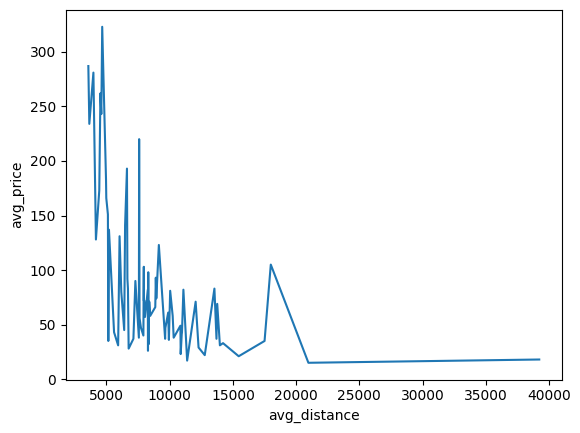

In [18]:
# df_all_housing_info.groupby('zipcode')[['lat','long']]
# avg_dist

sns.lineplot(data=avg_dist, x='avg_distance', y='avg_price')

In [ ]:
avg_dist2=avg_dist.copy()
avg_dist2['avg_distance'] = avg_dist['avg_distance']*(1/avg_dist['count'])

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='avg_price'>

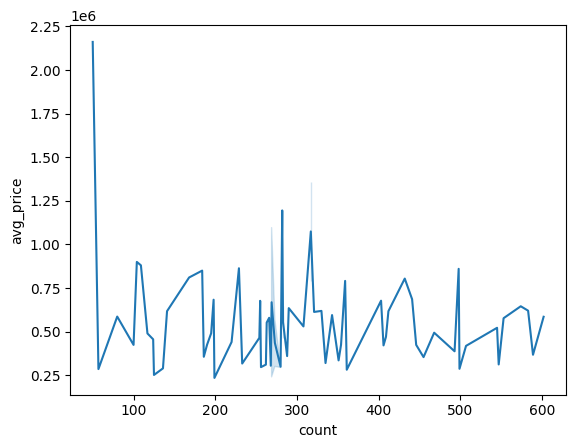

In [ ]:
####Test mit zipcodes
avg_dist3 =avg_dist2.copy()
avg_dist3.sort_values('count')
sns.lineplot(data=avg_dist3, x='count', y='avg_price')

In [ ]:
avg_dist2['avg_distance'] = avg_dist2['avg_distance'].round()
avg_dist2.sort_values('avg_distance')

,zipcode,avg_distance,avg_price,count
51,98117,9.0,576835.0,553
49,98115,11.0,619944.0,583
54,98122,13.0,634558.0,290
42,98103,13.0,585049.0,602
59,98144,14.0,594707.0,343
...,...,...,...,...
61,98148,90.0,284909.0,57
14,98024,142.0,586121.0,80
8,98010,155.0,423666.0,100
35,98070,179.0,489382.0,117


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_distance', ylabel='avg_price'>

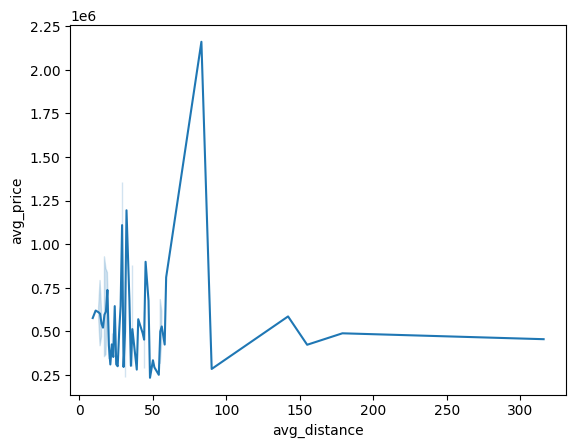

In [ ]:
sns.lineplot(data=avg_dist2, x='avg_distance', y='avg_price')

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_distance', ylabel='avg_price'>

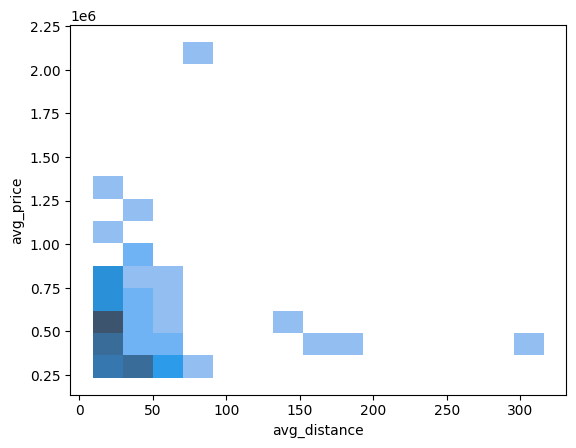

In [ ]:
sns.histplot(data=avg_dist2, x='avg_distance', y='avg_price',bins=15, kde=True)

/tmp/ipykernel_103248/1319511779.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = avg_dist.groupby(bins)['avg_price'].mean().reset_index()
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


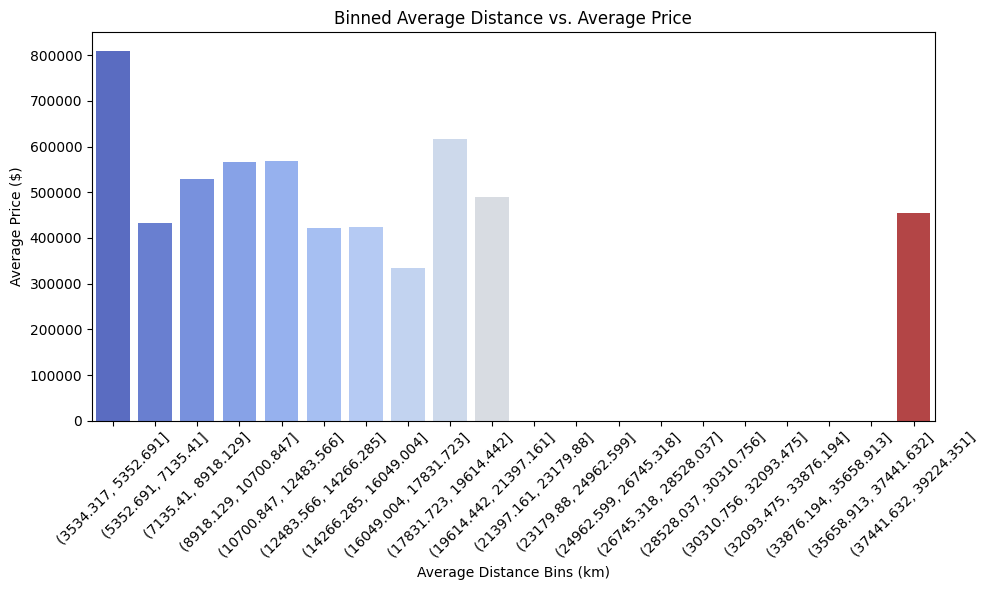

In [ ]:
# Bins erstellen
bins = pd.cut(avg_dist['avg_distance'], bins=20)
binned_data = avg_dist.groupby(bins)['avg_price'].mean().reset_index()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=binned_data['avg_distance'], y=binned_data['avg_price'], palette='coolwarm')

plt.xlabel('Average Distance Bins (km)')
plt.ylabel('Average Price ($)')
plt.title('Binned Average Distance vs. Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#try avg price per sqft